In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
plt.rcParams['font.family'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

#### 概览数据信息

In [3]:
#读取数据
tp = pd.read_excel('tb_pc.xlsx')

In [4]:
#数据预览
tp.head(2)

,store,head,price,sales,location,comment
0,dere戴睿旗舰店,笔记本电脑DERE戴睿R9 pro轻薄便携学生15.6英寸全新四核独显游戏本超薄超级上网手提...,1468.0,9772人付款,广东 深圳,28214
1,联想艾克兰斯专卖店,Lenovo/联想 拯救者 Y7000 15.6英寸游戏本笔记本电脑 i5轻薄独显,5499.0,1399人付款,北京,2898


In [5]:
#数据信息概览
tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 6 columns):
store       92 non-null object
head        92 non-null object
price       92 non-null float64
sales       92 non-null object
location    92 non-null object
comment     92 non-null int64
dtypes: float64(1), int64(1), object(4)
memory usage: 4.4+ KB


In [6]:
tp.describe()

,price,comment
count,92.000000,92.000000
mean,4653.876522,3341.782609
std,1923.350105,4832.466182
min,888.000000,20.000000
25%,3599.000000,356.500000
50%,4624.000000,1541.500000
75%,5821.250000,4034.250000
max,8999.000000,28214.000000


#### 数据清洗

In [7]:
#将付款人数提取出来并转换成‘int’
tp['sales_num'] = tp.sales.apply(lambda x: x[0:-3]).astype('int')

In [8]:
tp.head(2)

,store,head,price,sales,location,comment,sales_num
0,dere戴睿旗舰店,笔记本电脑DERE戴睿R9 pro轻薄便携学生15.6英寸全新四核独显游戏本超薄超级上网手提...,1468.0,9772人付款,广东 深圳,28214,9772
1,联想艾克兰斯专卖店,Lenovo/联想 拯救者 Y7000 15.6英寸游戏本笔记本电脑 i5轻薄独显,5499.0,1399人付款,北京,2898,1399


In [9]:
#按照店铺分类汇总，查看是否有异常数据
tp.pivot_table(index=['store','head'],values=['sales_num'],aggfunc={'sales_num':np.sum})[0:5]

sales_num
store       head                                                         
aierxuan旗舰店 aierxuan 焰魔 G2 游戏本i7独显 GTX1060/6G显卡 全新15.6英寸商务办...       1124
asus华硕官方旗舰店 Asus/华硕 灵耀S2代S4300FN 轻薄便携商务办公游戏笔记本电脑8代i5增强版超薄本1...       2353
chinantc    Hasee/神舟战神Z6I5I7独显GTX1060/1050Ti吃鸡游戏本笔记本电脑                290
daysky旗舰店   2019贺岁新款笔记本电脑Daysky X9 Plus轻薄便携学生15.6英寸手提商务办公游戏...       6939
            笔记本电脑Daysky DK 190轻薄便携学生14英寸手提办公商务游戏本秒I5/I7吃鸡电脑...       2425

In [10]:
#按照月销量排序，并获取各个链接销量排名
tp_sales = tp.sort_values('sales_num',ascending = False)
tp_sales.reset_index(drop=True)
tp_sales['sales_rank'] = range(1,len(tp_sales)+1)
tp_sales.reset_index(drop=True)[0:3]

,store,head,price,sales,location,comment,sales_num,sales_rank
0,dere戴睿旗舰店,笔记本电脑DERE戴睿R9 pro轻薄便携学生15.6英寸全新四核独显游戏本超薄超级上网手提...,1468.0,9772人付款,广东 深圳,28214,9772,1
1,daysky旗舰店,2019贺岁新款笔记本电脑Daysky X9 Plus轻薄便携学生15.6英寸手提商务办公游...,2198.0,6939人付款,广东 深圳,3353,6939,2
2,荣耀官方旗舰店,【14号256G低至3499】HONOR/荣耀 magicbook R5集显版+8G+512...,3999.0,6864人付款,广东 深圳,3524,6864,3


In [11]:
#获取综合排名
tp['rank'] = tp.index+1
tp['sales_rank'] = tp_sales['sales_rank']
tp.reset_index(drop=True).head(3)

,store,head,price,sales,location,comment,sales_num,rank,sales_rank
0,dere戴睿旗舰店,笔记本电脑DERE戴睿R9 pro轻薄便携学生15.6英寸全新四核独显游戏本超薄超级上网手提...,1468.0,9772人付款,广东 深圳,28214,9772,1,1
1,联想艾克兰斯专卖店,Lenovo/联想 拯救者 Y7000 15.6英寸游戏本笔记本电脑 i5轻薄独显,5499.0,1399人付款,北京,2898,1399,2,23
2,daysky旗舰店,2019贺岁新款笔记本电脑Daysky X9 Plus轻薄便携学生15.6英寸手提商务办公游...,2198.0,6939人付款,广东 深圳,3353,6939,3,2


In [12]:
#第四条数据为非正常排名数据，剔除
tp.drop(3,inplace=True)

In [13]:
tp.head(3)

,store,head,price,sales,location,comment,sales_num,rank,sales_rank
0,dere戴睿旗舰店,笔记本电脑DERE戴睿R9 pro轻薄便携学生15.6英寸全新四核独显游戏本超薄超级上网手提...,1468.0,9772人付款,广东 深圳,28214,9772,1,1
1,联想艾克兰斯专卖店,Lenovo/联想 拯救者 Y7000 15.6英寸游戏本笔记本电脑 i5轻薄独显,5499.0,1399人付款,北京,2898,1399,2,23
2,daysky旗舰店,2019贺岁新款笔记本电脑Daysky X9 Plus轻薄便携学生15.6英寸手提商务办公游...,2198.0,6939人付款,广东 深圳,3353,6939,3,2


In [14]:
tp.reset_index(drop=True,inplace=True)
tp.head(3)

,store,head,price,sales,location,comment,sales_num,rank,sales_rank
0,dere戴睿旗舰店,笔记本电脑DERE戴睿R9 pro轻薄便携学生15.6英寸全新四核独显游戏本超薄超级上网手提...,1468.0,9772人付款,广东 深圳,28214,9772,1,1
1,联想艾克兰斯专卖店,Lenovo/联想 拯救者 Y7000 15.6英寸游戏本笔记本电脑 i5轻薄独显,5499.0,1399人付款,北京,2898,1399,2,23
2,daysky旗舰店,2019贺岁新款笔记本电脑Daysky X9 Plus轻薄便携学生15.6英寸手提商务办公游...,2198.0,6939人付款,广东 深圳,3353,6939,3,2


#### 确认数据间的相关性

In [15]:
#将非相关特征剔除
X = tp.drop(['store','head','sales','location','sales_rank'],axis=1)
X.head(3)

,price,comment,sales_num,rank
0,1468.0,28214,9772,1
1,5499.0,2898,1399,2
2,2198.0,3353,6939,3


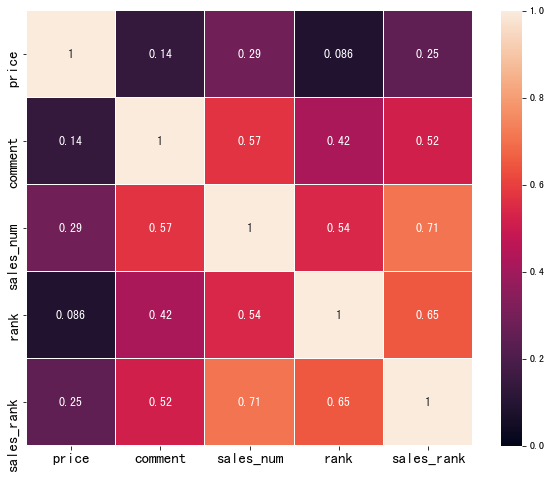

In [16]:
#绘制相关系数热力图
import seaborn as sns

X = tp.drop(['store','head'],axis=1)
corr = abs(X.corr())

fig,ax = plt.subplots(1,1,figsize=(10,8))
sns.heatmap(corr,vmax=1,vmin=0,annot=True,annot_kws={'size':12,'weight':'bold'},linewidths=0.05,ax=ax)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
#下图可知，综合排名与销量相关性较大

Text(0,0.5,'销售数量')

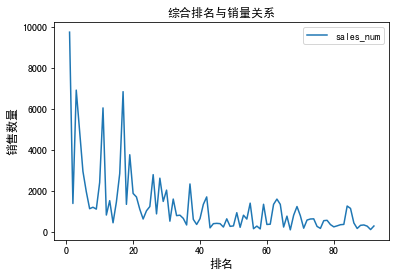

In [17]:
#绘制排名与销量的折线图，查看排名与销量变化关系
X.sort_values(by='rank',ascending=False).plot(x='rank',y='sales_num',title='综合排名与销量关系')
plt.xlabel('排名',fontsize=12)
plt.ylabel('销售数量',fontsize=12)


#### 按价格带分类 - 确定市场价格、销量、排名分布及定位

In [18]:
tp.price.max()
tp.price.min()
tp.price.median()

4699.0

In [19]:
bins=[0,3000,4000,6000,8000,9000]
labels =['0-2999','3000-3999','4000-5999','6000-7999','8k以上']
tp['价格带'] = pd.cut(tp.price,bins=bins,labels=labels)

In [20]:
np.percentile(tp.price,15)
np.percentile(tp.price,40)

4099.0

In [21]:
#按价格带分类汇总，并绘制出每个价格带的平均销量与平均排名之间的关系图

tp_cut = tp.groupby('价格带')['price','sales_num','rank','价格带'].agg({'price':np.mean,'sales_num':np.mean,
                                                                  'rank':np.mean,'价格带':'count'})
tp_cut

,price,sales_num,rank,价格带
价格带,,,,
0-2999,1894.000000,2152.588235,38.588235,17
3000-3999,3727.290556,1316.166667,49.000000,18
4000-5999,4970.268857,931.685714,51.600000,35
6000-7999,6877.750000,1002.250000,45.000000,16
8k以上,8596.800000,517.000000,42.000000,5


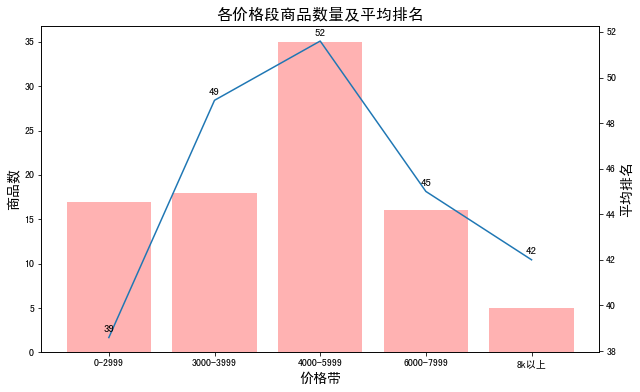

In [22]:
fig,ax1 = plt.subplots(figsize=(10,6))

data = tp.groupby('价格带')[['head','rank']].agg({'head':'count','rank':np.mean})
x = np.array(data.index)
y1 = data['head'].values
y2 = data['rank'].values

ax1.bar(x,y1,color='r',alpha=0.3)
ax1.set_ylabel('商品数',fontsize=14)
ax1.set_xlabel('价格带',fontsize=14)

ax2 = ax1.twinx()
ax2.plot(x,y2)
ax2.set_ylabel('平均排名',fontsize=14)

plt.title('各价格段商品数量及平均排名',fontsize=16)

for a,b in zip(x,y2):
    ax2.text(a,b+0.2,'%.0f'%b,ha='center',va='bottom',fontsize=11)

plt.show()
